# aSSIST MBA_Review 과제3

### - 아래 요청 내용대로 힌트(#표시 내용)를 참조하며 문제를 풀어 보세요.

In [1]:
# 작업환경 셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 경고메시지를 무시하고 더이상 안보이게
# import warnings
# warnings.filterwarnings('ignore')

# 그래프의 한글 폰트 설정(리눅스에서 한글 폰트 나눔고딕 설치후)
from matplotlib.pylab import rcParams
rcParams['font.family'] = 'NanumGothic'

# matplotlib 한글 폰트 오류 문제 해결한 후 위의 cell 다시 실행(윈도우에서)

# from matplotlib import font_manager, rc
# font_path = 'c:/Windows/Fonts/malgun.ttf'
# font_name = font_manager.FontProperties(fname = font_path).get_name()
# rc('font', family = font_name)

In [2]:
# '시도별 전출입 인구수' 파일 불러오기
data = pd.read_excel('Data/시도별 전출입 인구수.xlsx')
data.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [3]:
# 서울에서 다른 지역으로 이동한 데이터만 추출해 정리하기
data_seoul = data.fillna(method='ffill')
data_seoul = data_seoul[(data_seoul['전출지별'] == '서울특별시') & (data_seoul['전입지별'] != '서울특별시')]
data_seoul

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [4]:
# 아래 도표가 나오도록 데이터 전처리 하기
# 컬럼인덱스와 '전출지별' 컬럼 제거
data_seoul.drop(['전출지별'], axis=1, inplace=True)

# '전입지별' 컬럼명을 '전입지'로 수정
data_seoul.rename(columns={'전입지별': '전입지'}, inplace=True)

# 인덱스 제거
data_seoul.reset_index(drop=True, inplace=True)




In [5]:
# '전입지'를 인덱스로 변경
data_seoul.set_index('전입지', inplace=True)

# 변경된 DataFrame 출력
data_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


> #### Q1.서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구 데이터 값만 가져와 아래 테이블이 나오도록 코딩해 봅시다.

In [6]:
data_seoul.query("전입지 in ['충청남도', '경상북도', '강원도']")

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464


> #### Q2.  (응용 문제) 다수의 그래프를 한 번에 출력하는 코딩을 참조해 아래 그림과 같이 하나의 그래프에 '충청남도', '경상북도', '강원도' 인구 이동 수 선 그래프(Line graph)가 나오도록 아래 코딩을 완성해 봅시다.

In [7]:
# '충청남도' 행 가져오기
df_chungnam = data_seoul.query("전입지 == '충청남도'")
df_chungnam

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020


In [8]:
# '경상북도' 행 가져오기
df_gyeongbuk = data_seoul.query("전입지 == '경상북도'")
df_gyeongbuk

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464


In [9]:
# '강원도' 행 가져오기
df_gangwon = data_seoul.query("전입지 == '강원도'")
df_gangwon

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


/tmp/ipykernel_767/1834030112.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize=10)


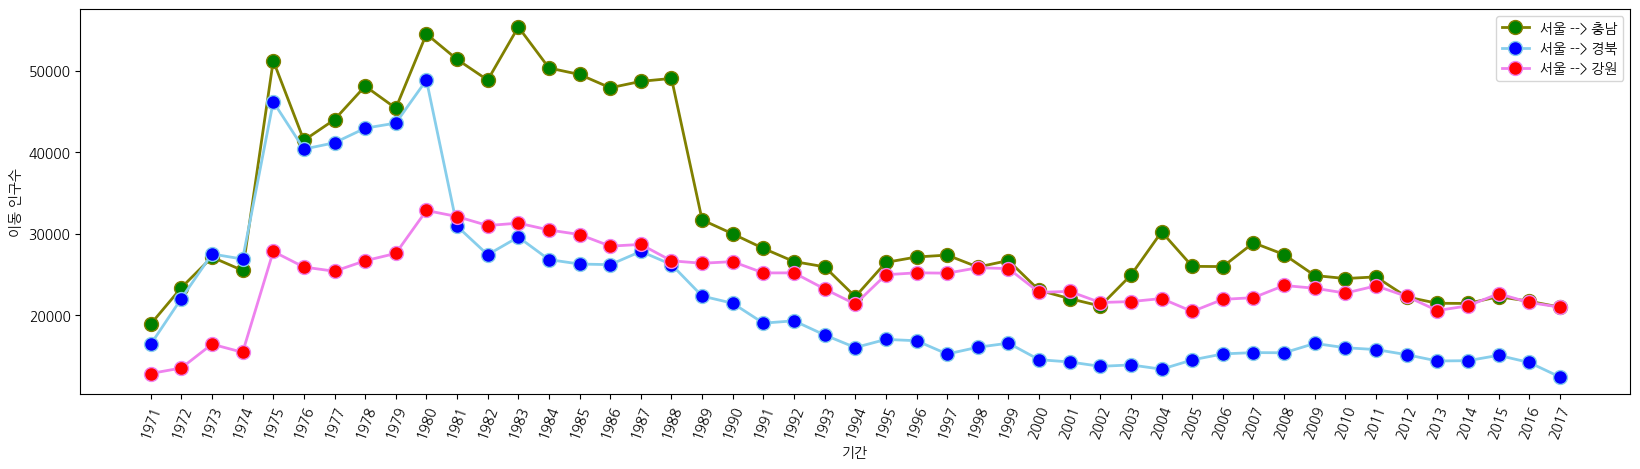

In [10]:
# 그래프 그리기
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_chungnam.columns[1:], df_chungnam.values.flatten()[1:].astype(int), marker='o', markerfacecolor='g', markersize=10,
        color='olive', linewidth=2, label='서울 --> 충남')
ax.plot(df_gyeongbuk.columns[1:], df_gyeongbuk.values.flatten()[1:].astype(int), marker='o', markerfacecolor='b', markersize=10,
        color='skyblue', linewidth=2, label='서울 --> 경북')
ax.plot(df_gangwon.columns[1:], df_gangwon.values.flatten()[1:].astype(int), marker='o', markerfacecolor='r', markersize=10,
        color='violet', linewidth=2, label='서울 --> 강원')

# 범례 추가
ax.legend()

# x축 이름과 y축 이름 설정
ax.set_xlabel('기간')
ax.set_ylabel('이동 인구수')

# x 축 레이블 회전
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize=10)

# 그래프 출력
plt.show()

> #### Q3. 아래 그래프가 나오도록 '전라남도' 데이터를 추가하여 그래프 작성 코딩을 해봅시다.

In [11]:
# '전라남도' 행 가져오기
df_jeonnam = data_seoul.query("전입지 == '전라남도'")
df_jeonnam 

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


/tmp/ipykernel_767/482267614.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_chungnam.columns, rotation = 70, fontsize=8)
/tmp/ipykernel_767/482267614.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_gyeongbuk.columns, rotation = 70, fontsize=8)
/tmp/ipykernel_767/482267614.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(df_gangwon.columns, rotation = 70, fontsize=8)
/tmp/ipykernel_767/482267614.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(df_jeonnam.columns, rotation = 70, fontsize=8)


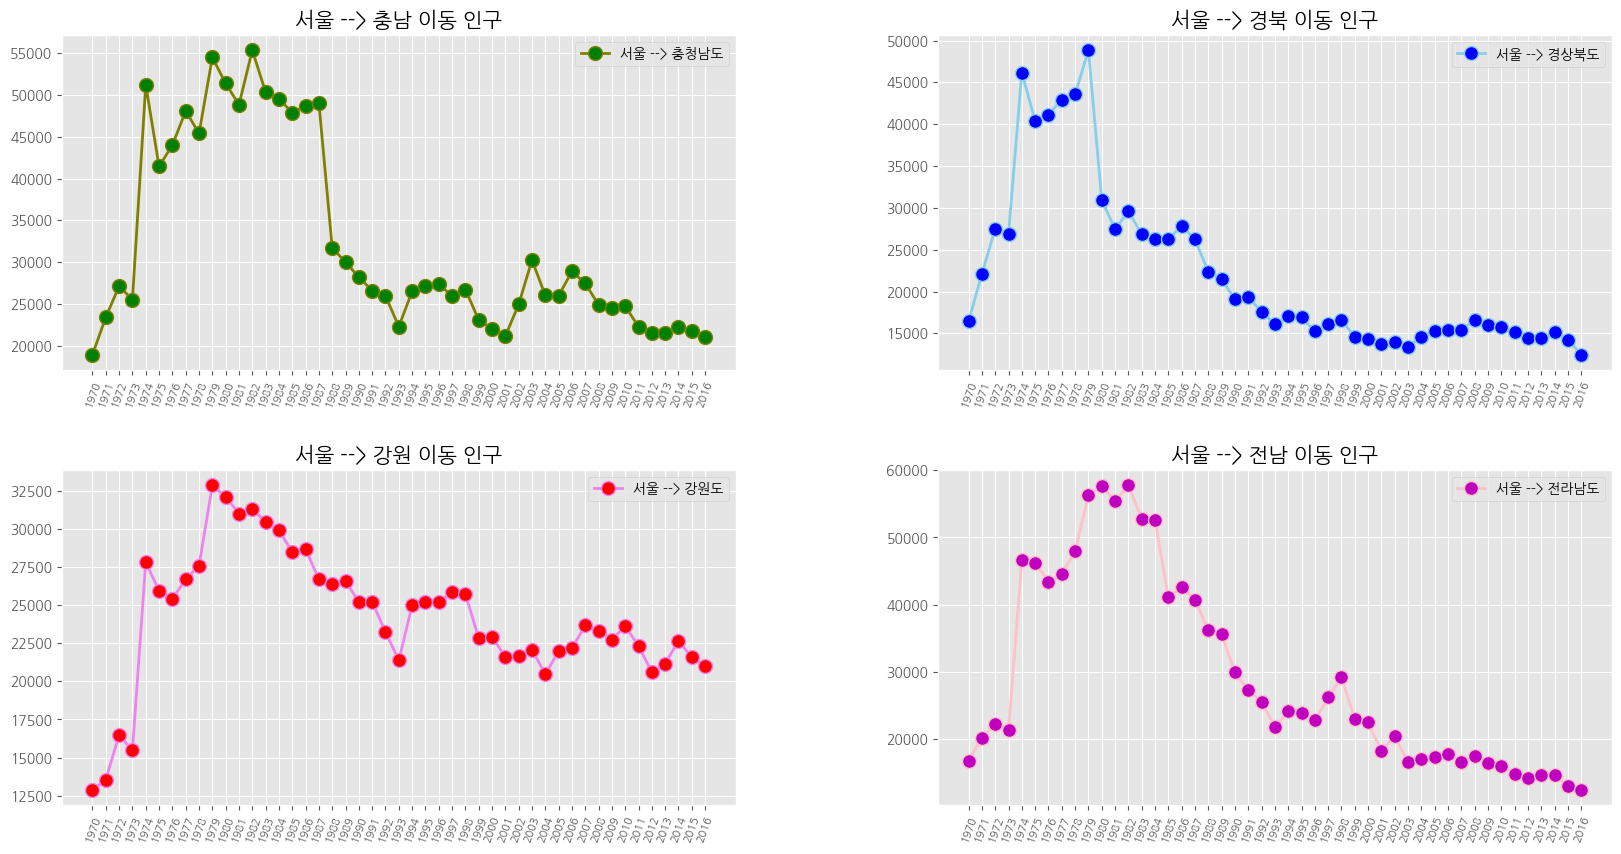

In [12]:
# 여러 개의 그래프를 동시에 비교하기
## 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 정리하기

plt.style.use('ggplot') # 그래프 sheet 스타일 지정
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# '충청남도' 그래프 그리기
ax1.set_title('서울 --> 충남 이동 인구', size = 15)
ax1.plot(df_chungnam.columns[1:], df_chungnam.values.flatten()[1:].astype(int), marker='o', markerfacecolor='g',
         markersize=10, color='olive', linewidth=2, label='서울 --> 충청남도')
ax1.legend(loc = 'best')

# '경상북도' 그래프 그리기
ax2.set_title('서울 --> 경북 이동 인구', size = 15)
ax2.plot(df_gyeongbuk.columns[1:], df_gyeongbuk.values.flatten()[1:].astype(int), marker='o', markerfacecolor='b',
         markersize=10, color='skyblue', linewidth=2, label='서울 --> 경상북도')
ax2.legend(loc = 'best')

# '강원도' 그래프 그리기
ax3.set_title('서울 --> 강원 이동 인구', size = 15)
ax3.plot(df_gangwon.columns[1:], df_gangwon.values.flatten()[1:].astype(int), marker='o', markerfacecolor='r',
         markersize=10, color='violet', linewidth=2, label='서울 --> 강원도')
ax3.legend(loc = 'best')

# '전라남도' 그래프 그리기
ax4.set_title('서울 --> 전남 이동 인구', size = 15)
ax4.plot(df_jeonnam.columns[1:], df_jeonnam.values.flatten()[1:].astype(int), marker='o', markerfacecolor='m',
         markersize=10, color='pink', linewidth=2, label='서울 --> 전라남도')
ax4.legend(loc = 'best')


# x 축 레이블 회전
ax1.set_xticklabels(df_chungnam.columns, rotation = 70, fontsize=8)
ax2.set_xticklabels(df_gyeongbuk.columns, rotation = 70, fontsize=8)
ax3.set_xticklabels(df_gangwon.columns, rotation = 70, fontsize=8)
ax4.set_xticklabels(df_jeonnam.columns, rotation = 70, fontsize=8)


# 그래프 간격 조정
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# 그래프 출력
plt.show()

> #### Q4. '충청남도', '경상북도', '강원도', '전라남도' 중 2010 ~ 2017년 사이의 이동 인구 합계가 가장 많은 곳은 어디일까요?
>> - 가로 막대 그래프('barh')를 그려 답을 찾아 보세요.

In [13]:
# 서울에서'충청남도', '경상북도', '강원도','전라남도'로 이동한 '2010'부터 '2017'까지의 인구 데이터 테이블 만들기
# df_select = data_seoul.query("전입지 in ['충청남도', '경상북도', '강원도', '전라남도']").loc[:, '2010':'2017']
df_select = data_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], '2010':'2017']
df_select

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [14]:
df_select.sum(axis=1).astype(float)

전입지
충청남도    179533.0
경상북도    117740.0
강원도     175731.0
전라남도    116035.0
dtype: float64

In [15]:
# '합계' column 만들기
df_select['합계'] = df_select.sum(axis=1).astype(float)
df_select

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533.0
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035.0


In [16]:
# '합계' sorting하기
# df_select.sort_values(by='합계')
df_select['합계'].sort_values()

전입지
전라남도    116035.0
경상북도    117740.0
강원도     175731.0
충청남도    179533.0
Name: 합계, dtype: float64

In [17]:
df_select.index

Index(['충청남도', '경상북도', '강원도', '전라남도'], dtype='object', name='전입지')

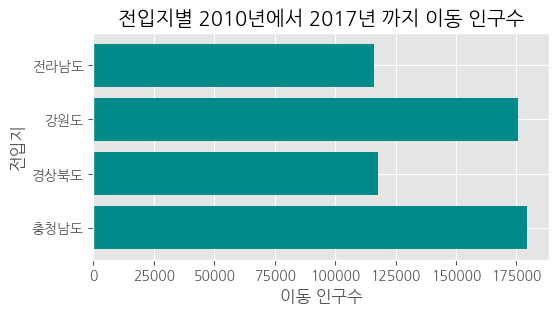

In [18]:
# '합계'로 가로 막대그래프 작성하기
plt.style.use('ggplot') # 그래프 sheet 스타일 지정
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(3, 3, 1)

# 가로 막대 그래프 그리기
ax1.barh(df_select.index, df_select['합계'], color='darkcyan')

# # 그래프 제목 설정
ax1.set_title('전입지별 2010년에서 2017년 까지 이동 인구수')

# # x축 레이블 설정
ax1.set_xlabel('이동 인구수')

# # y축 레이블 설정
# plt.ylabel('이동 인구수')
ax1.set_ylabel('전입지')

# 그래프 출력
plt.show()